In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [ ]:
T = 1
N = 100
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)

# Task 1.1





 # $$W(t_{i}) = W(t_{i-1}) + z \sqrt{Δ{t}}$$

In [ ]:
def f(Delta, X):
    W = [0]
    for i in range (1,len(X)):
        W += [ W [i -1]+ np.random.normal (0, 1, 1) * Delta ]
    return W

def Brownian_motion(T, N, t, Delta):
    X = np.linspace(0, T, N + 1)
    W = f(Delta, X)
    plt.figure ( figsize =(10, 7) )
    plt.grid()
    plt.plot(X, W, linewidth =2.0)
    plt.title('Wiener process')
    plt.xlabel("t")
    plt.ylabel("W")
    plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


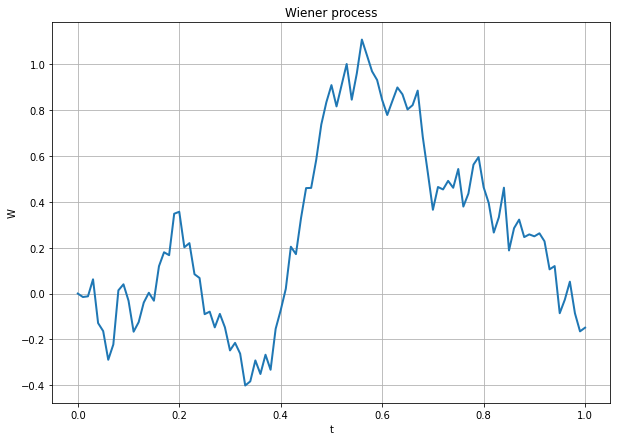

In [ ]:
Brownian_motion(T, N, t, Delta)

# Task 1.2

# $$S_{n} = X_{1} + X_{2} + ... + X_{n}$$
# $$P \left({S_{[nt]} \over \sqrt{n}} < X\right) → P(W(t) < x)$$
# $${S_{n} \over \sqrt{n}} → N(0, 1)$$ 

In [ ]:
def runif (n) :
    L =[]
    for i in range (n) :
        L += [2 * (np.random.uniform(0, 1) > 0.5) -1]
    return L

def function (x, n, S) :
    if x * n > 0:
        return S[int( x * n ) -1]
    else :
        return 0



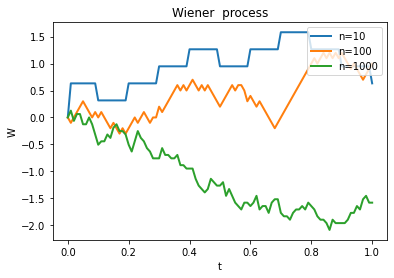

In [ ]:
n = 10
T = 1
t = [ i /N for i in range (N + 1) ]
S = np.cumsum(runif(n))
W = [ function(x, n, S) / np.sqrt(n) for x in t ]
plt.plot (t , W , linewidth =2.0)
n = 100
T = 1
t = [ i /100 for i in range (N + 1) ]
S = np.cumsum(runif(n))
W = [ function(x, n, S) / np.sqrt(n) for x in t ]
plt.plot(t , W , linewidth =2.0)
n = 1000
T = 1
t = [ i /100 for i in range (N + 1) ]
S = np.cumsum(runif(n))
W = [ function(x, n, S) / np.sqrt(n) for x in t ]
plt.plot (t , W , linewidth =2.0)
plt.title ("Wiener  process")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend ([ "n=10", "n=100", "n=1000"] , loc = "upper right")
plt.show ()


# Task 1.3

  # $$ ||f||^{2} = \left(\int_0^T |f(t)|^{2}dt\right)^{1 \over 2}$$
  # $$W(t) = W(t, \omega) = \sum_i Z_{i}(\omega) \phi_{i}(t)$$
  # $$\phi_{i}(t) = {(2 \sqrt{2T}) \over ((2i + 1) \pi)} \sin\left({(2i + 1) \pi t \over 2T}\right)$$

In [ ]:
def sum_W (t, T, Z):
    Sum = 0
    for i in range (len(Z)):
        Sum += Z[i] * (2 * np.sqrt(2 * T)) / ((2 * i + 1) * np.pi) * np.sin(((2 * i + 1) * np.pi * t) / (2 * T))
    return Sum


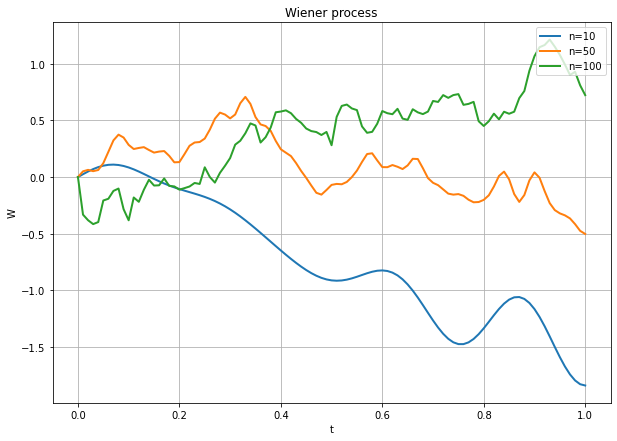

In [ ]:
plt.figure( figsize =(10, 7) )
plt.grid()

T = 1
N = 100
t = [ i /100 for i in range (101) ]
n = 10
Z = np.random.normal(0, 1, n)
W = []
for i in range (N + 1):
  W += [sum_W( t[i], T, Z )]
plt.plot(t, W, linewidth =2.0)
n = 50
Z = np.random.normal(0, 1, n )
W = []
for i in range(N + 1) :
  W +=[ sum_W(t[i] , T, Z ) ]
plt.plot(t, W, linewidth =2.0)
n = 100
Z = np.random.normal(0, 1, n )
W = []
for i in range(N + 1) :
  W +=[ sum_W(t[i] , T, Z ) ]
plt.plot(t , W , linewidth =2.0)
plt.title("Wiener process")
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend ([ "n=10", "n=50", "n=100"] , loc = "upper right")


# Task 1.4

   # $$S(t) = x \exp ((r - {\sigma^{2} \over 2})t - \sigma W(t))$$
   # $$S( t + \Delta t) = S(t) \exp ((r - {\sigma^{2} \over 2})(t + \Delta t -t) + \sigma (W(t + \Delta t) - W(t))$$

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


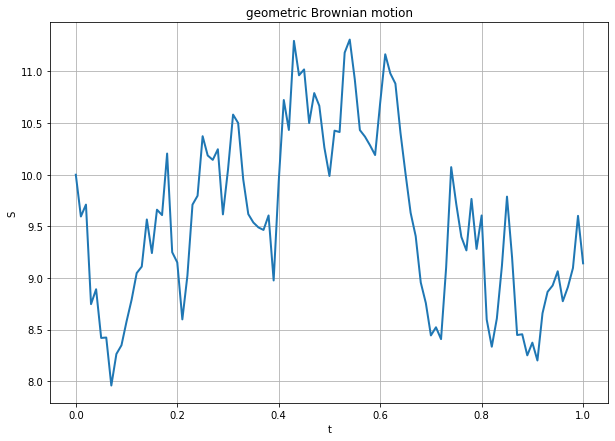

In [ ]:
  r = 0.2
  sigma = 0.5
  x = 10
  W = [0]
  for i in range(1, N + 1):
      W.append(W[i-1] + np.random.normal(0, 1, 1) * Delta)

  S = [x * np.exp((r - sigma ** 2 / 2) * t[i] + sigma * W[i]) for i in range (len(W))]
  plt.figure ( figsize =(10, 7) )
  plt.grid()
  plt.plot(t, S, linewidth =2.0)
  plt.title('geometric Brownian motion')
  plt.xlabel("t")
  plt.ylabel("S")
  plt.show() 

# Task 1.5

 # $$W_{t_0, x}^{T, y}(t) = x + W(t - t_0) - \frac{t - t_0}{T - t_0}(W(t - t_0) - y + x)$$

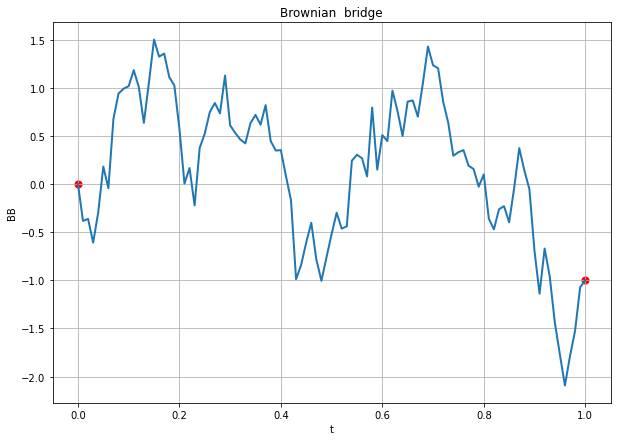

In [ ]:
W = [0]
t = list (np.linspace (0,T , N+1) ) #сетка времени

x = 0
y = -1

for i in range(1, N + 1):  # генерим винеровский процесс
    W.append(W[i - 1] + np.random.normal(0, 1, 1) * np.sqrt(Delta))

def BBB(x,y):
    BB = []
    for i in range(N+1):
        BB.append(x + W[i] - t[i] / T * (W[N] - y + x))  
    return BB

plt.figure(figsize= (10, 7))
plt.grid()
plt.plot(t , BBB(x,y) , linewidth =2.0)
plt.scatter( t [0] , x , color ="red",s =50)
plt.scatter( t [len( t ) -1] , y , color ="red", s =50)
plt.title("Brownian  bridge")
plt.xlabel("t")
plt.ylabel("BB")
plt.show()